# Numerical differentiation

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering  
Institute of Computational and Data Sciences  
Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Numerical differentiation

### Derivatives

Differentiation is the computation of a derivative. The derivative of a function is the change rate of the function with respect to its independent variables. Derivatives are the foundation of calculus. For a function $f(x)$ depending on one independent variable, the derivative is denoted as 
 \begin{equation}
   f'(x) =\frac{df(x)}{dx} 
 \end{equation}
 
Graphically, the derivative of a function $f(x)$ is the slope of the tangent line to the function curve at a point.
 
<img src="derivative_analytical.png" width="300"/>
<h3 align="center">Figure. Derivative of a function.</h3> 

For a differentiable function, i.e., its derivative exists, the derivative is defined as 
 \begin{equation}
   f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} 
 \end{equation}
From calculus, we already know how to calculate a derivative analytically. For example,
 \begin{equation}
 f(x) = x\sin x, \quad f'(x) = \sin x + x \cos x
 \end{equation}

However, there are cases where analytical calculation of derivative is not necessary, time consuming, difficult, or even impossible. For example, a function may not be able to be expressed explicitly and thus cannot be differentiated analytically. An example of such case is as follows:
\begin{equation}
  x \sin y + y \cos x = 0
\end{equation}
what is $y(x)$? And what is $\frac{dy}{dx}$? Another example if that the function is only known at discrete data points, which may come from measurements. 

Sometime, the function can be differentiated analytically, but the formula is too complicated or time-consuming to calculate. A numerical approximation is much simpler and good enough for practical use. 

In later chapters for the numerical solution of ODEs and PDEs, the solution is sought at discrete points only, not the solution function itself. We need to approximate the derivatives in the ODEs and PDEs. For example, heat transfer in a 1D rod is governed by:
 \begin{equation}
    \frac{d}{dx} \left( k \frac{dT}{dx} \right) = 0
 \end{equation}
 On a grid as shown in the following figure, we need to somehow evaluate the first and second order derivative of the temparature $T$ with the values at the grids.

<img src="heat_1d_rod.png" width="500"/>
<h3 align="center">Figure. 1D heat transfer in a rod.</h3> 


### Numerical differentiation

In contrast to analyical evaluation of derivatives, we can approximate the derivatives using numerical differentiation. Numerical differentiation is the calculation (approximately) of the derivative with some numerical methods. The idea is to replace (approximate) the tangent line with a line connecting two points close together on the curve.
 \begin{equation}
 f'(x_i) \approx \frac{\Delta f}{\Delta x} = \frac{f(x_i+\Delta x) - f(x_i)}{\Delta x}
 \end{equation}
 
<img src="derivative_numerical.png" width="300"/>
<h3 align="center">Figure. Numerical approximation of derivative.</h3>  
 
An important tool in this chapter for numerical differentiation is the Taylor series expansion (TSE). As a review, the TSE of a function $f(x)$ around $x=x_0$ is defined as
 \begin{equation}
 f(x) = f(x_0) + \frac{f'(x_0)}{1!} (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \frac{f'''(x_0)}{3!} (x-x_0)^3 + \ldots
 \end{equation}
 
Our goal in this chapter is to derive finite-difference formulas for the derivatives of function $f(x)$ at $x=x_i$. We will introduce methods for 
- first-order derivatives
- second-order derivatives
- and higher-order derivatives

Before we go to the derivations, a very useful notation is the big $O$ notation: $O(\cdot)$ denotes the limiting behavior of a function or its bound. For example, let the step size $\Delta x = h$ 
 \begin{equation}
 O(h), O(h^2), O(h^3), \ldots, O(h^n)
 \end{equation}
which donote the behavior as linearly proportional, square, cubic, etc. of $h$. In our derivations, we note error = $O(h^n)$: error approaches zero at a rate similar to $h^n$.

## Derivation of differentiation formulas

### First-order derivatives
Three finite difference schemes will be introduced. They are foward differencing, backward differencing, and central differencing. Refer to the figure above for our derivations.

First, the forward differencing. We apply TSE to $f(x_{i+1})$ around $x_i$ and call it TSE$_f$:
\begin{equation}
 	   f(x_{i+1}) = f(x_i) + f'(x_i) h + \frac{f''(\xi)}{2} h^2
\end{equation}
here $h=x_{i+1}-x_i$, and $\xi \in [x_i, x_{i+1}]$. Solve for $f'(x_i)$ to get
\begin{equation}
 	   f'(x_i) = \frac{f(x_{i+1})-f(x_i)}{h} - \frac{f''(\xi)}{2}h = \frac{f(x_{i+1})-f(x_i)}{h} - O(h)
\end{equation}

Next, the backward differencing scheme. Similarly, we apply TSE to $f(x_{i-1})$ around $x_i$ and call it TSE$_b$:
\begin{equation}
 	   f(x_{i-1}) = f(x_i) - f'(x_i) h + \frac{f''(\xi)}{2} h^2
\end{equation}
where $h=x_{i}-x_{i-1}$, and $\xi \in [x_{i-1}, x_{i}]$. Solve for $f'(x_i)$ to get
\begin{equation}
 	   f'(x_i) = \frac{f(x_{i})-f(x_{i-1})}{h} + \frac{f''(\xi)}{2}h = \frac{f(x_{i})-f(x_{i-1})}{h} + O(h)
\end{equation}

Lastly, the central| differencing scheme. We also apply TSE$_f$ and TSE$_b$ with up to second-order terms to get:
\begin{equation}
 	   \textrm{TSE}_f: f(x_{i+1}) = f(x_i) + f'(x_i) h + \frac{f''(x_i)}{2} h^2 + O(h^3)
\end{equation} 	   

\begin{equation}
 	   \textrm{TSE}_b: f(x_{i-1}) = f(x_i) - f'(x_i) h + \frac{f''(x_i)}{2} h^2 - O(h^3)
\end{equation}
 	   
Then, TSE$_c$ = TSE$_f$ - TSE$_b$, which means
 	   \begin{equation}
 	   f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{2h} + O(h^2)
 	   \end{equation}


In summary, we have derived the three schemes for the first order derivative. They are listed and compared in the following table.

| Scheme | Formula for $f'(x_i)$ | Error | Order |
| :---:  |    :----:             |  :---:| :---: |
|Forward | $\frac{f(x_{i+1})-f(x_i)}{h}$ | $O(h)$ | 1$^{st}$ | 
|Backward | $\frac{f(x_{i})-f(x_{i-1})}{h}$ | $O(h)$ | 1$^{st}$ | 
|Central | $\frac{f(x_{i+1})-f(x_{i-1})}{2h}$ | $O(h^2)$ | 2$^{nd}$ |

Both forward and backward differencing schemes are 1$^{st}$ order ($O(h)$), meaning the error will be proportional to the step size $h$. If we reduce the step size $h$ by half, the error will also be reduced by half. Central differencing scheme is 2$^{nd}$ order ($O(h^2)$), which means the error will be proportional to the step size squared $h^2$. If we reduce the step size $h$ by half and the error will be reduced to a quarter! So the central differencing scheme has higher accuracy than the other two.

Example: The settling trajectory $z(t)$ of a sediment particle in still water was recorded with a high speed camera and is shown in the table. Use the three differencing schemes to calculate the velocity.

| time $t$ (s) | position $z$ (m) |  velocity $v$ (m/s)} |
| :---:  |    :----:             |  :---:| 
|        |                       |     forward or backward or central |
|  0  |  0  | | 
| 0.2 |  0.02 | |
| 0.4 |  0.05 | | 
| 0.6 |  0.09 | | 
| 0.8 |  0.14 | |
| 1.0 | 0.20  | |

The following is an implementation of the forward, backward, and central differencing schemes.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

#calculate and return the first derivative of the function f(x) at x=x0 with a step
#size h. Three finite differencing schemes are implemented: foward, 
#backward, and central.
def first_derivative(f,x0,method,h):
    if method == 'central':
        return (f(x0 + h) - f(x0 - h))/(2*h)
    elif method == 'forward':
        return (f(x0 + h) - f(x0))/h
    elif method == 'backward':
        return (f(x0) - f(x0 - h))/h
    else:
        raise ValueError("Wrong choice of scheme. Must be 'central', 'forward' or 'backward'.")
        

#define the function
def func(x):
    return x*np.exp(x)

#set parameters
x0 = 0.2
h = 0.01

print("Derivative with central differencing = ", first_derivative(func,x0,'central',h))
print("Derivative with forward differencing = ", first_derivative(func,x0,'forward',h))
print("Derivative with backward differencing = ", first_derivative(func,x0,'backward',h))
print("Exact derivative with analyitical solution = ", (1.0+x0)*np.exp(x0))

Derivative with central differencing =  1.4657484518019153
Derivative with forward differencing =  1.4791840958882085
Derivative with backward differencing =  1.4523128077156222
Exact derivative with analyitical solution =  1.4656833097922037


### Second-order derivatives

The derivation for finite difference schemes for 2$^{nd}$-order derivatives is similar to that for the 1$^{st}$-order derivatives. Apply TSE$_f$ and TSE$_b$ with up to third-order terms to get:
\begin{equation}
 	   \textrm{TSE}_f: f(x_{i+1}) = f(x_i) + f'(x_i) h + \frac{f''(x_i)}{2!} h^2 + \frac{f'''(x_i)}{3!} h^3 + O(h^4)
\end{equation} 	   

\begin{equation}
 	   \textrm{TSE}_b: f(x_{i-1}) = f(x_i) - f'(x_i) h + \frac{f''(x_i)}{2!} h^2 - \frac{f'''(x_i)}{3!} h^3 + O(h^4)
\end{equation}
 	   
Adding them together, i.e., TSE$_f$ + TSE$_b$, to get:
 	   \begin{equation}
 	   		f(x_{i+1}) + f(x_{i-1}) = 2 f(x_i) + f''(x_i) h^2 + O(h^4)
 	   \end{equation}
Solve for $f''(x_i)$ to get:
 	   \begin{equation}
 	   f''(x_i) = \frac{f(x_{i-1}) - 2 f(x_i) + f(x_{i+1})}{h^2} + O(h^2)
 	   \end{equation}
       
The formula we derived for $f''(x_i)$ uses $x_{i-1}$, $x_i$, and $x_{i+1}$ with the point $x_i$ centered. This is indeed called central differencing. Similar to the first-order derivatives, we can also use TSE to get forward and backward differencing. The key is to use the proper combinations of TSE for $f(x_{i-2})$, $f(x_{i-1})$, $f(x_{i})$, $f(x_{i+1})$, and $f(x_{i+2})$. Similar to the table for first-order derivatives, we have the following table for second-order derivatives. 

| Scheme | Formula for $f''(x_i)$ | Error | Order |
| :---:  |    :----:             |  :---:| :---: |
|Forward | $\frac{f(x_{i})-2f(x_{i+1})+f(x_{i+2})}{h^2}$ | $O(h)$ | 1$^{st}$ | 
|Backward | $\frac{f(x_{i-2})-2f(x_{i-1})+f(x_{i})}{h^2}$ | $O(h)$ | 1$^{st}$ | 
|Central | $\frac{f(x_{i-1}) - 2 f(x_i) + f(x_{i+1})}{h^2}$ | $O(h^2)$ | 2$^{nd}$ | 

Example: for the same data in the example for the first-order derivative, calculate the acceleration which is the second-order derivative. 


## Accuracy of numerical derivatives

Based on the derived schemes above, one very natural quesiton is how to increase the accuracy of numerical derivatives. We have the following options.
- reduce the step size $\Delta x = h$
- use higher-order schemes (involving more data points)
- Richardson extrapolation

For the first option, there is not too much to discuss. The reduction of step size, if feasible, does increae the accuracy. For the second option, we need to introduce some higher-order schemes. We have seen first- and second-order schemes, such as forward, backward, and central schemes. We can increase the accuracy to higher than second by including additional terms in the TSE. For example, for the first-order derivative, we can have the following fourth-order accuracy scheme
\begin{equation}
  f'(x_i) = \frac{f(x_{i-2}) - 8 f(x_{i-1}) + 8 f(x_{i+1}) - f(x_{i+2})}{12h} + O(h^4)
\end{equation}
which involves four data points neighboring $x_i$. 

For Richardsoon extrapolation, the basic idea is to use two derivatives from two different step sizes $h$ to calculate a third, more accurate approximation. Let $D$ be the exact derivative, then two approximate, numerical derivatives $D_1$ and $D_2$ with step sizes $h_1$ and $h_2$ can be calculated with errors $E_1$ and $E_2$.
   \begin{equation}
   D = D_1 + E_1
   \end{equation}
   \begin{equation}
   D = D_2 + E_2
   \end{equation}   
   or
   \begin{equation}\label{eqn:two_errors}
    D_1 + E_1 = D_2 + E_2
   \end{equation}
Assume $D_1$ and $D_2$ are obtained with a second-order differentiation scheme, then 
   \begin{equation}
   E_1 = O(h_1^2), \quad E_2 = O(h_2^2)
   \end{equation}
   so
   \begin{equation}
   \frac{E_1}{E_2} \approx \frac{h_1^2}{h_2^2} \textrm{ or } E_1 \approx E_2 \left(\frac{h_1}{h_2} \right)^2
   \end{equation}
Plug into the equation above, we get
	\begin{equation}
	D_1 + E_2 \left(\frac{h_1}{h_2} \right)^2 \approx D_2 + E_2
	\end{equation}
Solve for $E_2$:
	\begin{equation}
	E_2 \approx \frac{D_2-D_1}{(h_1/h_2)^2-1}
 \end{equation}		
This gives us an approximation for the error $E_2$ with only knowing the two estimates $D_1$ and $D_2$, and the two step sizes $h_1$ and $h_2$. Then the derivative estimate $D_2$ can be improved by adding the corresponding error $E_2$, i.e.,
	\begin{equation}
	D = D_2 + E_2 \approx D_2 + \frac{D_2-D_1}{(h_1/h_2)^2-1}
	\end{equation}
This new formula is higher-order because in the error $E_2$, the second-order error cancels each other because of $D_2-D_1$. Indeed, it is a fourth-order scheme, i.e., $O(h^4)$, from two estimates of $O(h^2)$.

In practice, a special case of Richardson extrapolation is often used where $h_2=h_1/2$. Thus,
	\begin{equation}
	D \approx D_2 + \frac{D_2-D_1}{(h_1/h_2)^2-1} = D_2 + \frac{D_2-D_1}{4} = \frac{4}{3}D_2 - \frac{1}{3}D_1
	\end{equation}
	
Example: numerical derivative of $f(x)=xe^x$ at $x$ = 0.2. Note the exact derivative is $f'(x)=(1+x)e^x$.

## Some practical issues for numerical differentiation

In practice, there might be some issues which need speical attention. These issues include 
- unevenly distributed data points
- noise and errors in data

### Unevenly distributed data points
All formulas derived so far are for evenly distributed data points at $x_i$. Evenly distributed data points are common for table of values generated from a function, uniform grid points for the solution of ODEs and PDEs (recall the 1D-rod heat transfer problem). However, in many other situations, for example measurement data, the data points may be not evenly distributed. One solution to solve this problem is to fit a curve with adjacent points and then use that to calculate the derivatives.

### Noise and error effect in numerical derivatives
Noise and error in data can have a huge effect in the numerical derivatives becasue the differentiation operation amplifies the perturbations. You can imagine that numerical integration is more noise tolerant. 

The following example caculates and plots the derivative of a simple function. Some random noise (perturbation) is added to the function values and then the derivatives from both the original and perturbed function values are compared. 

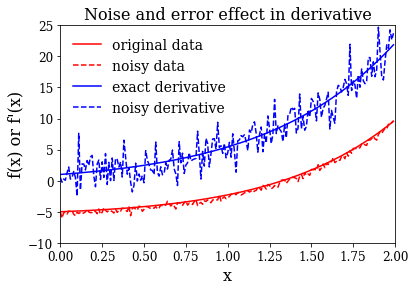

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp  
import sys

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#calculate and return the first derivative of the function f(x) at x=x0 with a step
#size h. Three finite differencing schemes are implemented: foward, 
#backward, and central.
def first_derivative(f,x0,method,h):
    if method == 'central':
        return (f(x0 + h) - f(x0 - h))/(2*h)
    elif method == 'forward':
        return (f(x0 + h) - f(x0))/h
    elif method == 'backward':
        return (f(x0) - f(x0 - h))/h
    else:
        raise ValueError("Wrong choice of scheme. Must be 'central', 'forward' or 'backward'.")

        

#define the function
def func(x):
    return x*np.exp(x)-5

#define the noisy function
#The noise follows a random normal distribution
def func_noisy(x):
    return x*np.exp(x) -5 + np.random.normal(-0.3,0.3,len(x))

#analyitcal derivative 
def func_prime(x):
    return (1+x)*np.exp(x)


x = np.arange(0,2,0.01)
f = func(x)
fprime = func_prime(x)
f_noisy = func_noisy(x)

fprime_noisy = first_derivative(func_noisy,x,'central',0.1)

#plot the function (original and perturbed)
plt.plot(x, f, 'r', label="original data")
plt.plot(x, f_noisy, 'r--', label="noisy data")

#plot the derivative (original and perturbed)
plt.plot(x, fprime, 'b', label="exact derivative")
plt.plot(x, fprime_noisy, 'b--', label="noisy derivative")

#set the limit for the x and y axes
plt.xlim([0,2])
plt.ylim([-10,25])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x) or f\'(x)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Noise and error effect in derivative',fontsize=16)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper left',fontsize=14,frameon=False)
#plt.savefig("noisy_derivative.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

There are several options to deal with noisy data. Most of them use some level of smoothing or filtering to the noisy data and then use the filtered data to calculate numerical derivative. The following example shows the use of B-spline curve fitting with the noisy data. Curve fitting here serves as a filter. 

In [3]:
import numpy as np
from scipy.interpolate import splrep, splev
import matplotlib.pyplot as plt
from math import exp  
import scipy
import sys

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#define the function
def func(x):
    #return 2*x**4-x**3-5*x**2-x+5
    return np.polynomial.polynomial.polyval(x,[0,2,-2,-0.6,1])

#define the noisy function
def func_noisy(x):
    return func(x) + np.random.normal(0,0.1,len(x))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#plot the function 
x = np.arange(0,2,0.01)
f = func(x)
f_noisy = func_noisy(x)

#calcualte the derivative using the noisy data
fprime_noisy = np.gradient(f_noisy,x)

#fit the noisy data to splines
spl = splrep(x,f_noisy,k=5,s=3)

#use the fitted spline to evaluate the new (smoothed) 
#function value
f_smoothed = splev(x, spl)

#use the fitted spline to evaluate the new (smoothed)
#function derivative
fprime_smoothed = splev(x,spl,der=1)

#plot the noisy and smooth function values
ax1.plot(x, f_noisy, 'r', label="noisy data")
ax1.plot(x, f_smoothed, 'r--', label="smooothed data")

#plot the derivatives from the noisy and smoothed function values
ax2.plot(x, fprime_noisy, 'b', label="noisy derivative")
ax2.plot(x, fprime_smoothed, 'b--', label="smoothed derivative")

#set the limit for the x and y axes
ax1.set_xlim([0,2])
ax1.set_ylim([-1,8])
ax2.set_ylim([-20,40])

#set x and y axes label and font size
ax1.set_xlabel('x',fontsize=16)
ax1.set_ylabel('f(x)',fontsize=16)
ax2.set_ylabel('f\'(x)',fontsize=16)

#show the ticks on both axes and set the font size 
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Smoothing for noisy data',fontsize=16)

#show legend, set its location, font size, and turn off the frame
ax1.legend(loc='upper left',fontsize=12,frameon=False)
ax2.legend(loc='upper right',fontsize=12,frameon=False)

#plt.savefig("smoothing_noisy_derivative.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

## Python libraries and functions for differentiation

Scipy proives the "derivative(...)" function to evaluate the derivative using central differencing with different orders. 
[scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

In [170]:
import numpy as np
import scipy.misc

#define the function
def func(x):
    return x*np.exp(x)-5

x0 = 0.2
h = 0.01

print("Derivative calculated by scipy.misc.derivative(...) function = ", scipy.misc.derivative(func,x0,h))

Derivative calculated by scipy.misc.derivative(...) function =  1.4657484518019182


Numpy also provides the "gradient(...)" function to compute the second-order accurate central differences in the interior points and either first- or second-order accurate forward or backward differences at the boundaryies. 
[numpy.gradient(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html).

In [171]:
import numpy as np

#define the function
def func(x):
    return x*np.exp(x)-5

x = np.arange(0,1,0.1)
f = func(x)

fprime = np.gradient(f,x)

print("x = ", x)
print("Derivative calculated by np.gradient(...) function = \n", fprime)

x =  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Derivative calculated by np.gradient(...) function = 
 [1.10517092 1.22140276 1.47220275 1.76224664 2.09701497 2.48270701
 2.9263313  3.43580731 4.02007952 4.33210057]


As we have seen in previous example, Scipy's interpolate module also provides interpolation functionalities which can be used to take derivatives. For example, the B-spline interpolation function scipy.interpolate.splrep and scipy.interpolate.splev. Examples on how to use them can be found in their documentation.

In addition, there are several smoothing/filtering functions which can be applied to noisy data to remove the bumpiness and then to get better approximation to derivatives. One of them is the **signal** model in scipy. [scipy.signal](https://docs.scipy.org/doc/scipy-0.16.1/reference/signal.html). For example, scipy.signal.savgol_filter(...) function. Examples on how to use them can be found in their documentation. 